<a href="https://colab.research.google.com/github/vedanttule134/Airline-Passenger-Referral-Prediction/blob/main/Airline_Passenger_Referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Airline Passenger Referral Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Vedant Tule
##### **Team Member 2 -** Lovpreet Singh
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Data includes airlines reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in spring 2019. The main objective is to predict weather passengers will predict the airline to their friends.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [82]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [83]:
# Load Dataset
data_airline_reviews ='https://docs.google.com/spreadsheets/d/1HQ98vyhbUW1cMwHn73ooW8AfeFYuymOh/edit?usp=sharing&ouid=107151537593111328204&rtpof=true&sd=true'
data_airline_reviews ='https://drive.google.com/uc?id=' + data_airline_reviews.split('/')[-2]
airline_df = pd.read_excel(data_airline_reviews)

### Dataset First View

In [28]:
# Dataset First Look
airline_df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [29]:
# Dataset Rows & Columns count
airline_df.shape

(131895, 17)

### Dataset Information

In [30]:
# Dataset Info
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [84]:
# Dataset Duplicate Value Count
airline_df.duplicated().sum()

70711

In [85]:
#droping the null values
airline_df.drop_duplicates(inplace = True)

In [86]:
airline_df.duplicated().sum()

0

In [34]:
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes


In [87]:
airline_df = airline_df.drop([0])

In [75]:
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


#### Missing Values/Null Values

In [76]:
# Missing Values/Null Values Count
airline_df.isnull().sum()

airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64

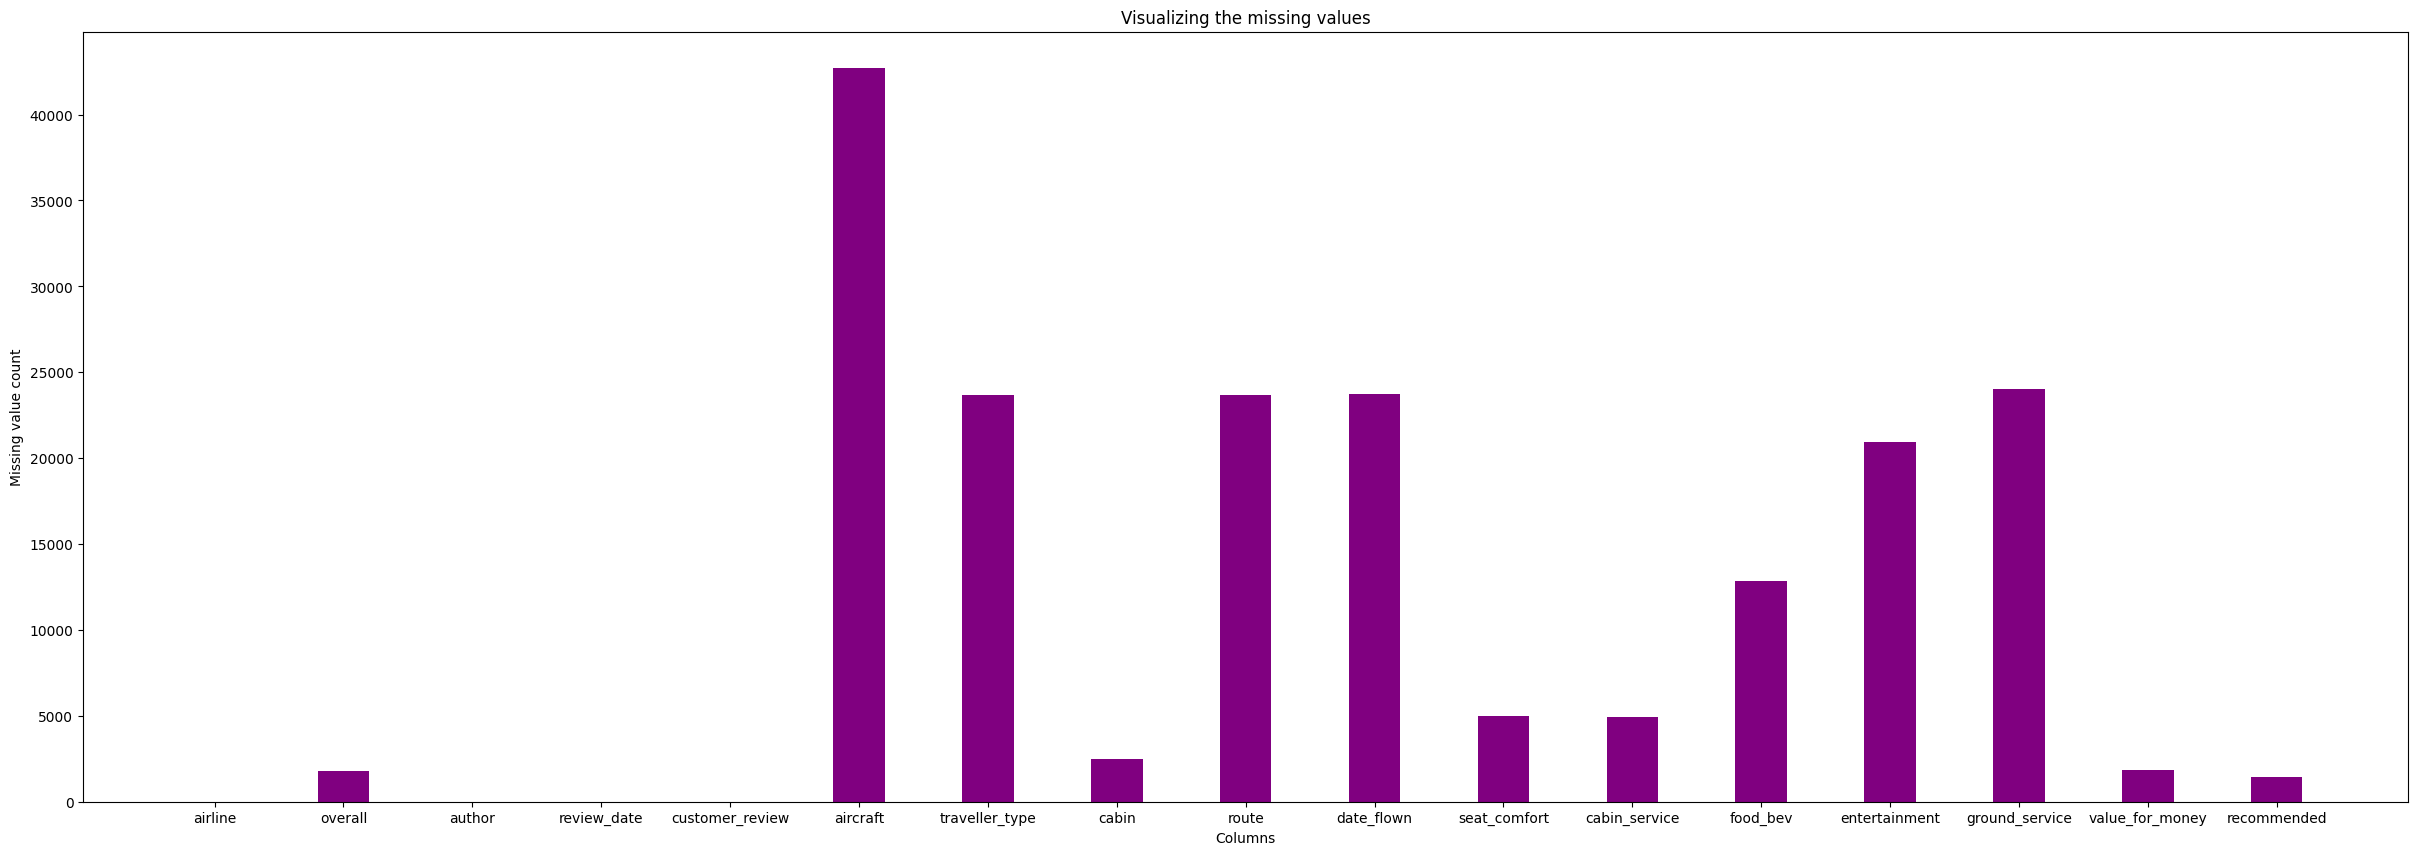

In [41]:
# Visualizing the missing values
courses = list(airline_df.columns)
values = list(airline_df.isnull().sum())
fig = plt.figure(figsize = (30, 10))
plt.bar(courses, values, color ='purple',
        width = 0.4)
plt.xlabel("Columns")
plt.ylabel("Missing value count")
plt.title("Visualizing the missing values")
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [42]:
# Dataset Columns
airline_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [43]:
# Dataset Describe
airline_df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,59401.000000,56211.000000,56240.000000,48341.000000,40230.000000,37169.000000,59327.000000
mean,5.164863,2.959278,3.200231,2.926956,2.887994,2.681347,2.950849
std,3.483701,1.436467,1.568429,1.483122,1.504452,1.613995,1.588433
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Variables Description 


1.  **airline:** Name of the airline.
2.  **overall:** Overall points are given to the trip between 0 & 10.
3.  **author:** Author of the trip
4.  **review_date:** Date of the Review 
5.  **customer_review:** Reviews given by customers about the flight experience.
6.  **aircraft:** Type of the aircraft
7.  **traveller_type:** Type of traveler (e.g. business, leisure) 
8.  **cabin:** Cabin type (e.g. Economy Class, Business Class, Premium Economy or First Class)
9.  **route:** The travel from and to destination of the customer.
10. **date_flown:** Date of the flight
11. **seat_comfort:** Rated between 1-5
12. **cabin_service:** Rated between 1-5
13. **food_bev:** Rated between 1-5 
14. **entertainment:** Rated between 1-5
15. **ground_service:** Rated between 1-5
16. **value_for_money:** Rated between 1-5
17. **recommended:** Referred to friend(Yes or No)

### Check Unique Values for each variable.

In [44]:
# Check Unique Values for each variable.
print(len(airline_df.airline.unique()))
print(len(airline_df.author.unique()))
print(len(airline_df.customer_review.unique()))
print(len(airline_df.aircraft.unique()))
print(len(airline_df.traveller_type.unique()))
print(len(airline_df.cabin.unique()))
print(len(airline_df.route.unique()))
print(len(airline_df.recommended.unique()))

81
44069
61172
2089
5
5
24550
3


In [17]:
airline_df['traveller_type'].value_counts()

Solo Leisure      13935
Couple Leisure     9699
Family Leisure     7142
Business           6764
Name: traveller_type, dtype: int64

In [18]:
airline_df['cabin'].value_counts()

Economy Class      45171
Business Class      9590
Premium Economy     2412
First Class         1532
Name: cabin, dtype: int64

In [19]:
airline_df['recommended'].value_counts()

no     31268
yes    28493
Name: recommended, dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [88]:
# Write your code to make your dataset analysis ready.
# Dropping some columns which have lots of NaN values 
# Dropping these columns because it can introduce bias and affect the performance of the model
airline_df.drop(columns=['aircraft','route','author','customer_review','date_flown'],axis=1,inplace=True)

In [89]:
# Dropping all rows which has NaN values in some columns
airline_df.dropna(subset=['recommended'],inplace=True)

In [90]:
airline_df['traveller_type'].fillna(method="ffill",inplace=True)

In [92]:
airline_df['cabin'].fillna(method="ffill",inplace=True)

In [101]:
from sklearn.impute import KNNImputer

missing_cols = ['overall', 'seat_comfort', 'cabin_service','food_bev','entertainment','ground_service','value_for_money']
imputer = KNNImputer(n_neighbors=5)
airline_df[missing_cols] = imputer.fit_transform(airline_df[missing_cols])

In [93]:
airline_df.isnull().sum()

airline                0
overall             1764
review_date            0
traveller_type         0
cabin                  0
seat_comfort        3550
cabin_service       3521
food_bev           11420
entertainment      19531
ground_service     22592
value_for_money      434
recommended            0
dtype: int64

In [106]:
airline_df.shape

(59761, 12)

In [107]:
airline_df.head()

,airline,overall,review_date,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,8th May 2019,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,7th May 2019,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,7th May 2019,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,6th May 2019,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,6th May 2019,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [108]:
top_10_airlines = airline_df['airline'].value_counts().head(10)
top_10_airlines = top_10_airlines.reset_index()
top_10_airlines.columns = ['airline', 'count']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Spirit Airlines'),
  Text(1, 0, 'American Airlines'),
  Text(2, 0, 'United Airlines'),
  Text(3, 0, 'British Airways'),
  Text(4, 0, 'Emirates'),
  Text(5, 0, 'China Southern Airlines'),
  Text(6, 0, 'Frontier Airlines'),
  Text(7, 0, 'Ryanair'),
  Text(8, 0, 'Delta Air Lines'),
  Text(9, 0, 'Turkish Airlines')])

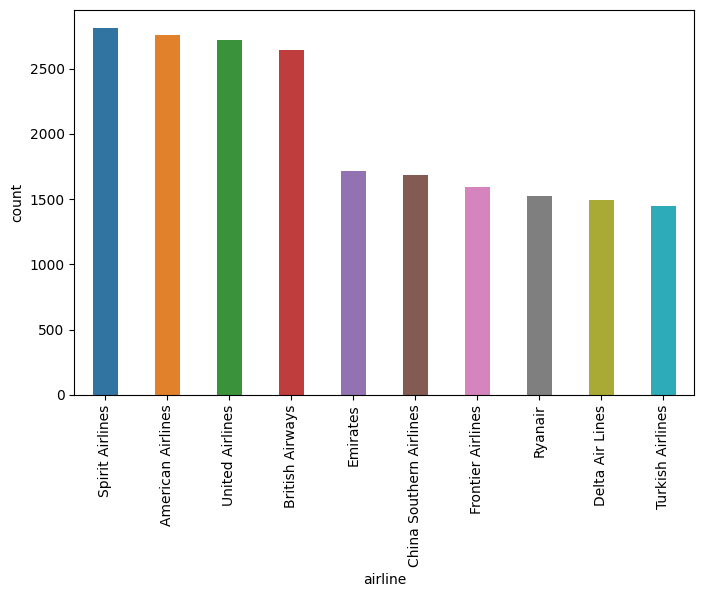

In [109]:
# Chart - 1 visualization code
plt.subplots(figsize=(8, 5))
sns.barplot(x='airline', y='count', data=top_10_airlines, width = 0.4)
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 2

In [110]:
airline_df['recommended'].value_counts()

no     31268
yes    28493
Name: recommended, dtype: int64

<Axes: xlabel='recommended', ylabel='count'>

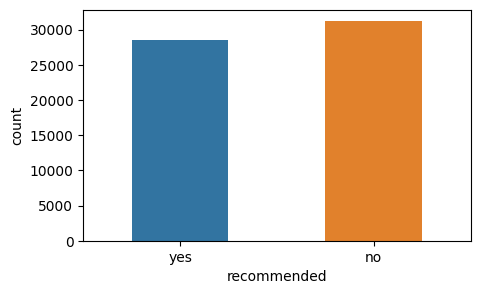

In [111]:
# Chart - 2 visualization code
plt.subplots(figsize=(5, 3))
sns.countplot(x='recommended', data=airline_df, width = 0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Answer Here

#### Chart - 3

In [112]:
airline_df['traveller_type'].value_counts()

Solo Leisure      23955
Couple Leisure    15573
Business          10348
Family Leisure     9885
Name: traveller_type, dtype: int64

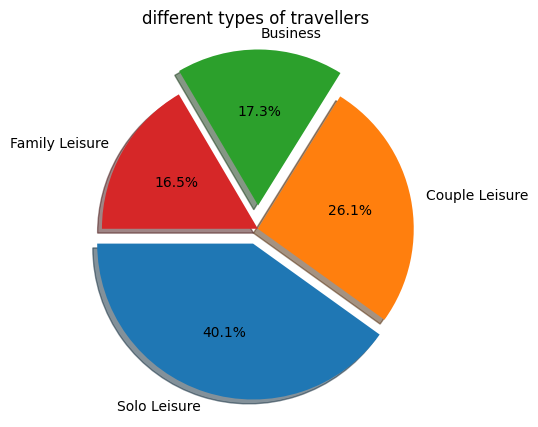

In [113]:
# Chart - 3 visualization code
labels = 'Solo Leisure' , 'Couple Leisure' , 'Business' , 'Family Leisure'
sizes = airline_df.traveller_type.value_counts()
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, 
        autopct='%1.1f%%',shadow=True,  startangle=180)
plt.axis('equal')
plt.title("different types of travellers")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

<Axes: xlabel='traveller_type', ylabel='count'>

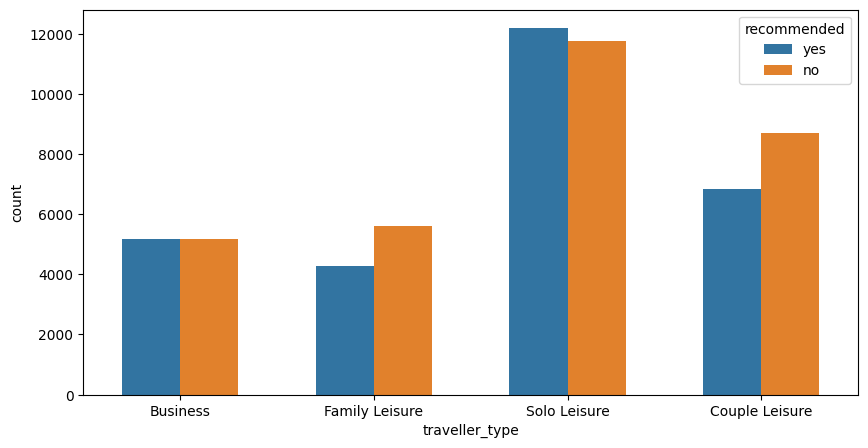

In [114]:
# Chart - 4 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x=airline_df['traveller_type'],hue=airline_df['recommended'], width = 0.6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [115]:
airline_df['cabin'].value_counts()

Economy Class      46096
Business Class      9662
Premium Economy     2436
First Class         1567
Name: cabin, dtype: int64

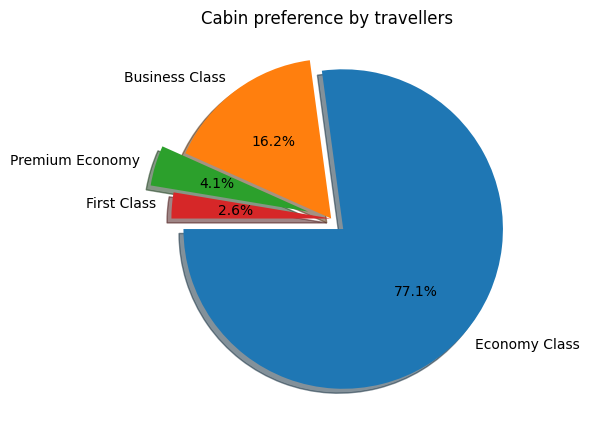

In [116]:
# Chart - 5 visualization code
labels = 'Economy Class' , 'Business Class' , 'Premium Economy' , 'First Class'
sizes = airline_df.cabin.value_counts()
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, 
        autopct='%1.1f%%',shadow=True,  startangle=180)
plt.axis('equal')
plt.title("Cabin preference by travellers")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

<Axes: xlabel='cabin', ylabel='count'>

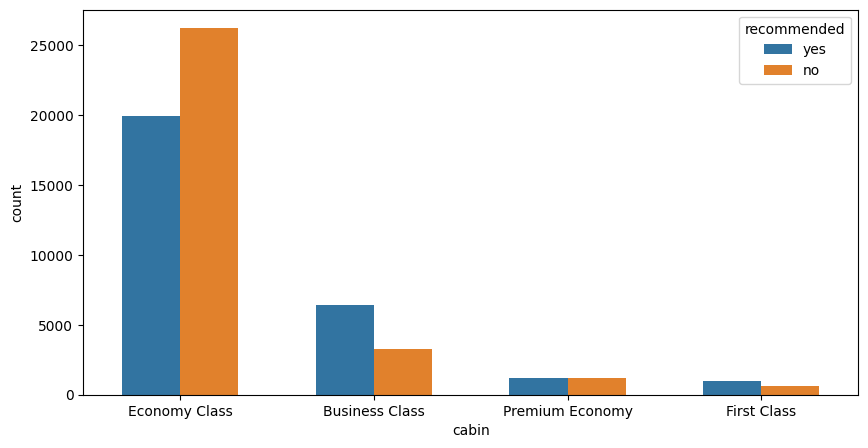

In [117]:
# Chart - 6 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x=airline_df['cabin'],hue=airline_df['recommended'], width = 0.6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

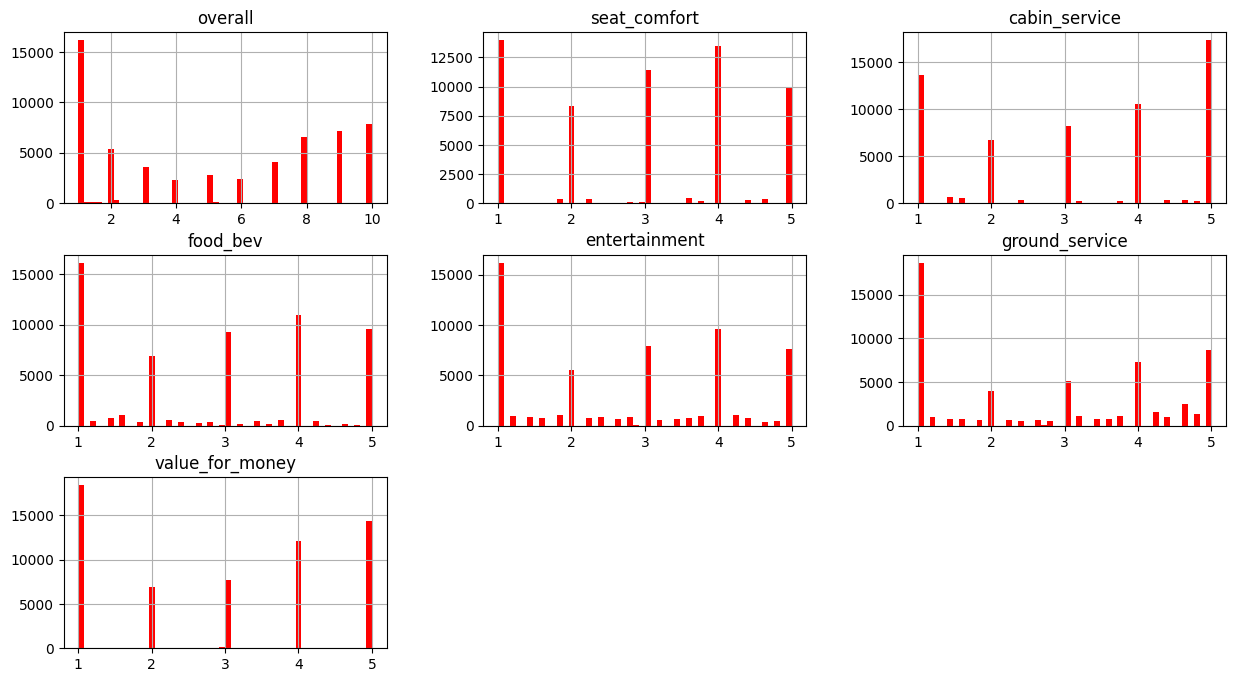

In [118]:
# Chart - 7 visualization code
airline_df.hist(bins=50, figsize=(15,8),color = 'red')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [119]:
# Chart - 8 visualization code
airline_df['review_date']=pd.to_datetime(airline_df['review_date'])
airline_df['Year'] = airline_df['review_date'].apply(lambda x: x.year)
airline_df['Month'] = airline_df['review_date'].apply(lambda x: x.month)
airline_df['Day'] = airline_df['review_date'].apply(lambda x: x.day)

In [122]:
data_by_year = airline_df.groupby('Year')['airline'].count()

<Axes: xlabel='Year'>

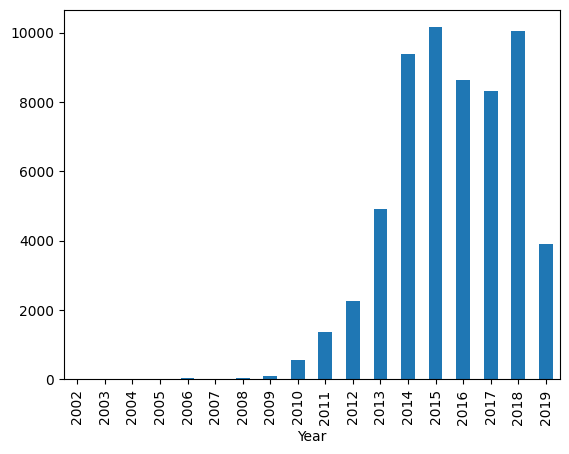

In [154]:
data_by_year.plot(kind='bar')

<Axes: xlabel='Month'>

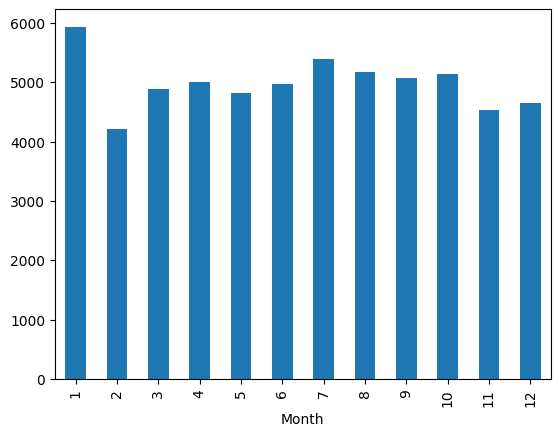

In [155]:
data_by_month = airline_df.groupby('Month')['airline'].count()
data_by_month.plot(kind='bar')

In [173]:
airline_df.drop(columns=['review_date','Year', 'Month','Day'],axis=1,inplace=True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

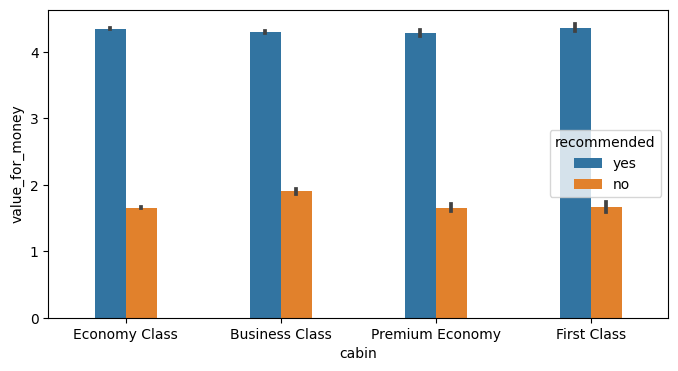

In [168]:
# Chart - 9 visualization code
plt.figure(figsize=(8,4))
cabin_ = sns.barplot(x=airline_df['cabin'],y=airline_df['value_for_money'], hue=airline_df['recommended'], width = 0.4)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [185]:
# Chart - 10 visualization code
plt.figure(figsize=(8,4))
cabin_ = sns.barplot(x=airline_df['cabin'],y=airline_df['seat_comfort'], hue=airline_df['recommended'], width = 0.4)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

<Axes: xlabel='cabin', ylabel='overall'>

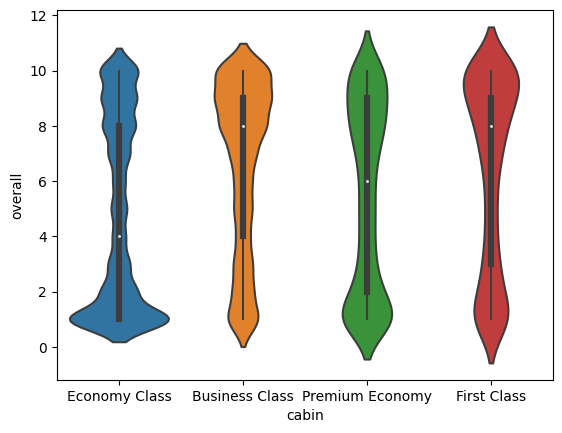

In [169]:
# Chart - 12 visualization code
sns.violinplot(x="cabin", y="overall",hue=None, data=airline_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

<Axes: xlabel='traveller_type', ylabel='overall'>

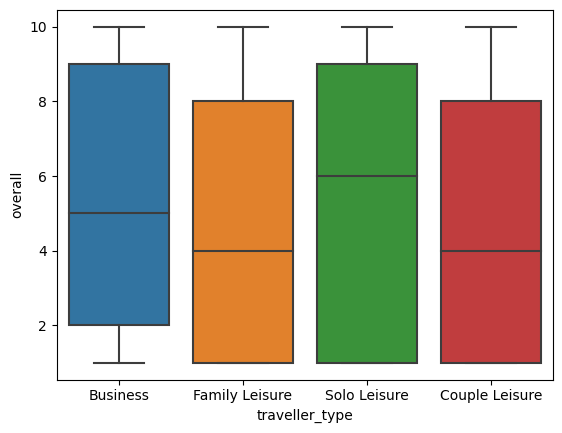

In [170]:
# Chart - 13 visualization code
sns.boxplot(x="traveller_type", y="overall", data=airline_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<ipython-input-174-30ed07108fb0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = airline_df.corr()


<Axes: >

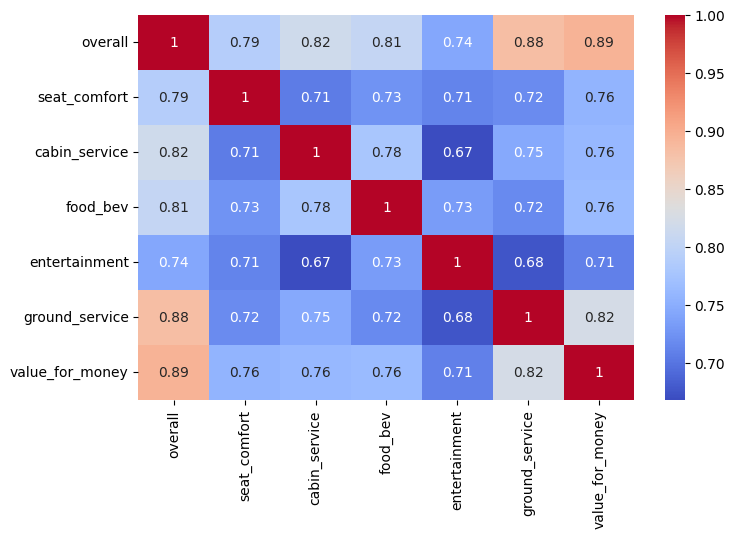

In [174]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8,5))
correlation = airline_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

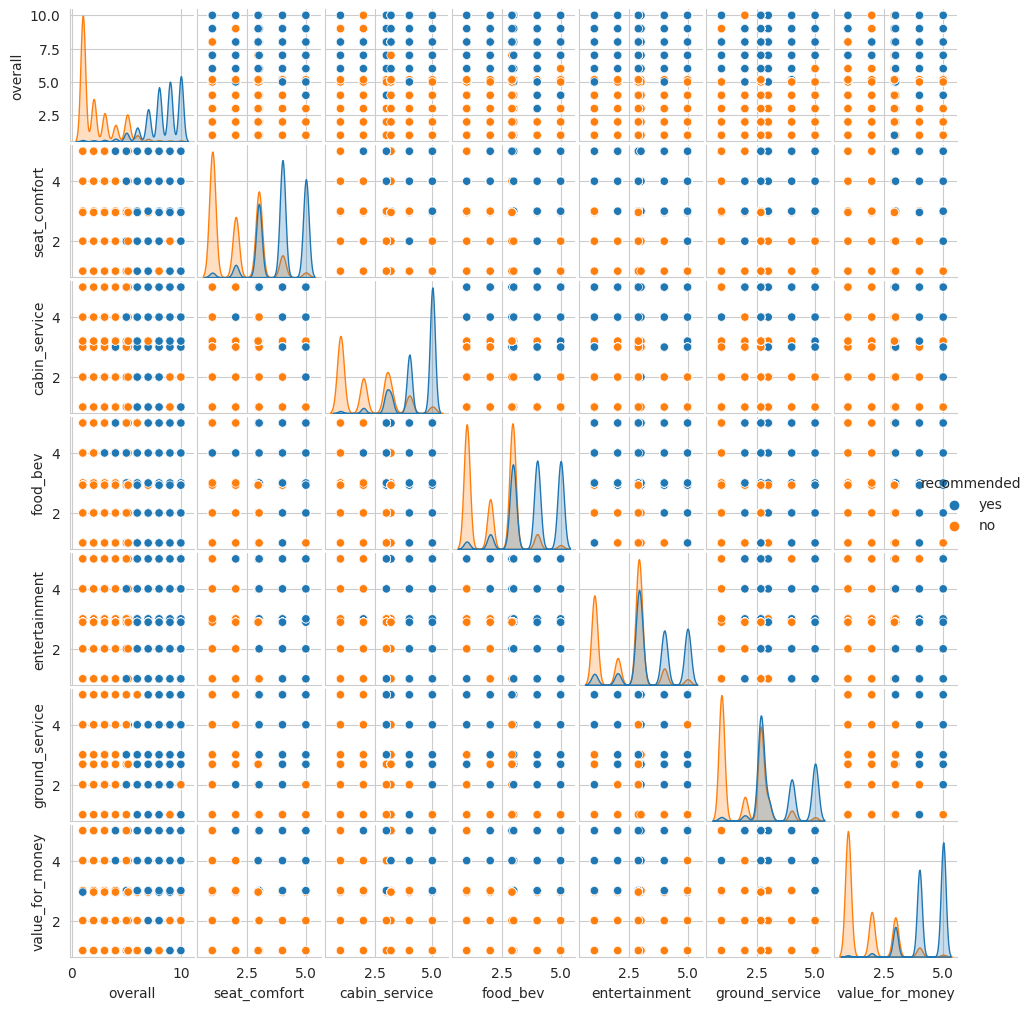

In [37]:
# Pair Plot visualization code
sns.set_style("whitegrid", {'axes.grid' : True})
pp=sns.pairplot(airline_df,hue='recommended')
pp.fig.set_size_inches(10,10);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***